In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


sp500 = yf.download('^GSPC', period='10y')
msft = yf.download('MSFT', period='10y')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
print("S&P 500 Data:")
print(sp500.head())
print("\nMicrosoft Data:")
print(msft.head())

S&P 500 Data:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-03-17  1842.810059  1862.300049  1842.810059  1858.829956  1858.829956   
2014-03-18  1858.920044  1873.760010  1858.920044  1872.250000  1872.250000   
2014-03-19  1872.250000  1874.140015  1850.349976  1860.770020  1860.770020   
2014-03-20  1860.089966  1873.489990  1854.630005  1872.010010  1872.010010   
2014-03-21  1874.530029  1883.969971  1863.459961  1866.520020  1866.520020   

                Volume  
Date                    
2014-03-17  2860490000  
2014-03-18  2930190000  
2014-03-19  3289210000  
2014-03-20  3327540000  
2014-03-21  5270710000  

Microsoft Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-03-17  37.900002  38.410000  37.790001  38.049999  32.220924  20479600
2014-03-18  

In [25]:
print("\nSummary Statistics for S&P 500:")
print(sp500.describe())
print("\nSummary Statistics for Microsoft:")
print(msft.describe())


Summary Statistics for S&P 500:
              Open         High          Low        Close    Adj Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean   3068.067118  3084.578635  3050.399193  3068.667016  3068.667016   
std     925.641946   931.589144   919.834275   926.095717   926.095717   
min    1818.180054  1834.189941  1810.099976  1815.689941  1815.689941   
25%    2163.510010  2169.050049  2154.770020  2163.750000  2163.750000   
50%    2832.409912  2846.159912  2817.729980  2834.399902  2834.399902   
75%    3959.939941  3981.879883  3928.820068  3962.709961  3962.709961   
max    5175.140137  5189.259766  5151.879883  5175.270020  5175.270020   

             Volume  
count  2.517000e+03  
mean   3.958987e+09  
std    9.657171e+08  
min    1.296530e+09  
25%    3.366030e+09  
50%    3.782370e+09  
75%    4.319440e+09  
max    9.976520e+09  

Summary Statistics for Microsoft:
              Open         High          Low        Close    Adj Cl

In [26]:
print("\nNull values in S&P 500 data:")
print(sp500.isnull().sum())
print("\nNull values in Microsoft data:")
print(msft.isnull().sum())


Null values in S&P 500 data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Null values in Microsoft data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


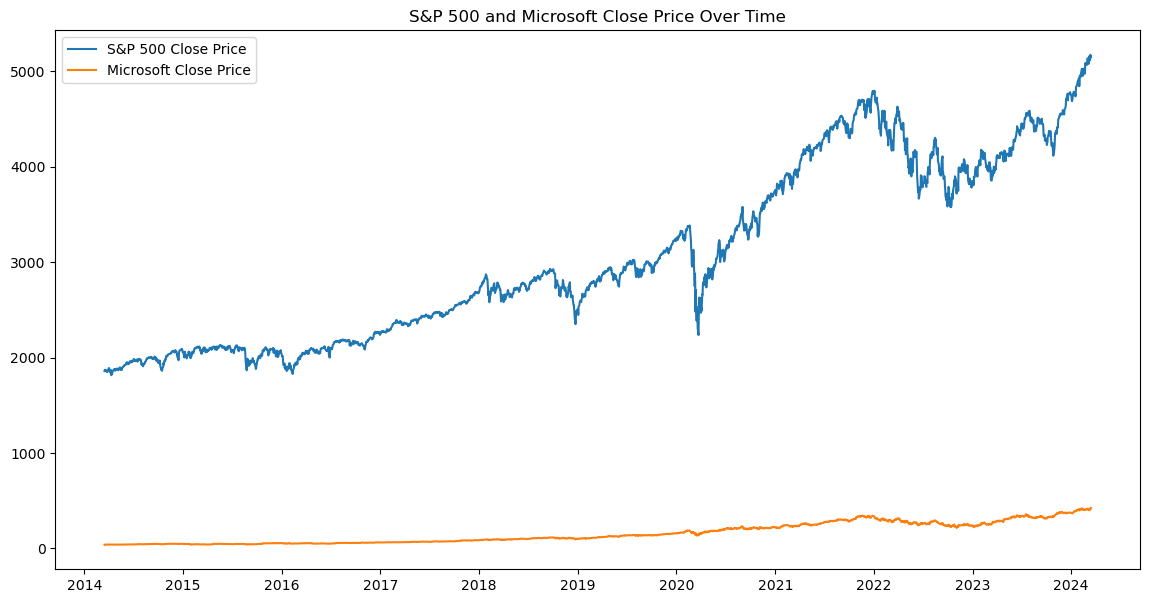

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(sp500['Close'], label='S&P 500 Close Price')
plt.plot(msft['Close'], label='Microsoft Close Price')
plt.title('S&P 500 and Microsoft Close Price Over Time')
plt.legend()
plt.show()

In [28]:
correlation = sp500['Close'].corr(msft['Close'])
print("\nCorrelation between S&P 500 and Microsoft Close Prices:", correlation)


Correlation between S&P 500 and Microsoft Close Prices: 0.9836098248252457


In [3]:
#Volatility Measurement
sp500['Returns'] = sp500['Close'].pct_change()
msft['Returns'] = msft['Close'].pct_change()
print("\nS&P 500 Volatility:", sp500['Returns'].std())
print("Microsoft Volatility:", msft['Returns'].std())


S&P 500 Volatility: 0.011164960394011714
Microsoft Volatility: 0.0170523261937203


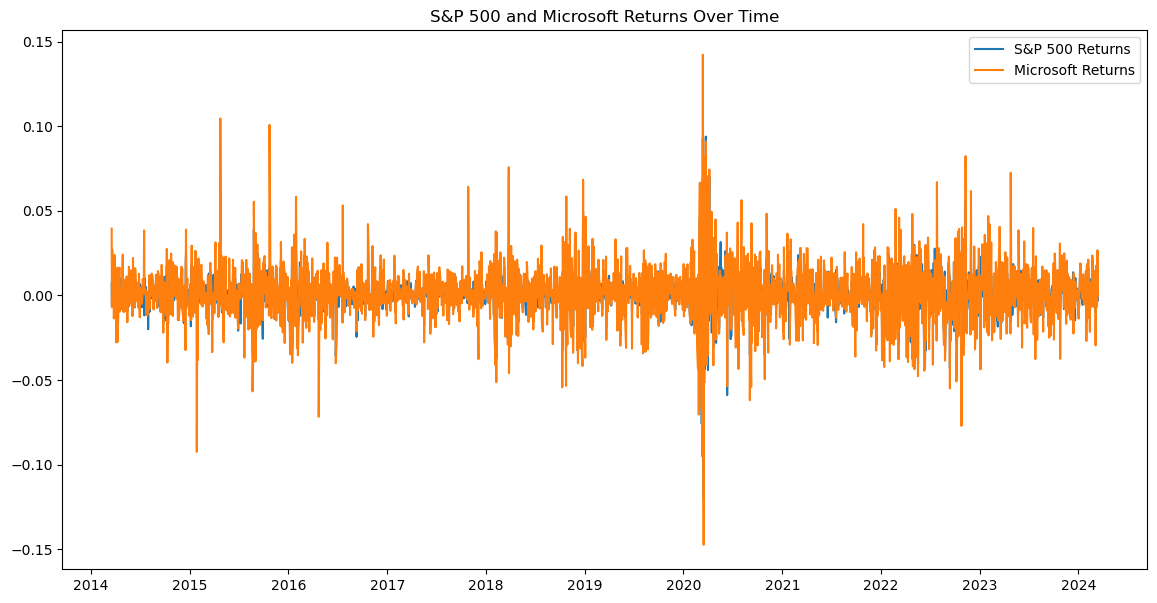

In [4]:
# Plotting the returns
plt.figure(figsize=(14, 7))
plt.plot(sp500['Returns'], label='S&P 500 Returns')
plt.plot(msft['Returns'], label='Microsoft Returns')
plt.title('S&P 500 and Microsoft Returns Over Time')
plt.legend()
plt.show()

In [5]:
pip install yfinance pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:             MSFT_Close   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 7.484e+04
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:31:44   Log-Likelihood:                -11005.
No. Observations:                2517   AIC:                         2.201e+04
Df Residuals:                    2515   BIC:                         2.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -189.3568      1.323   -143.109      

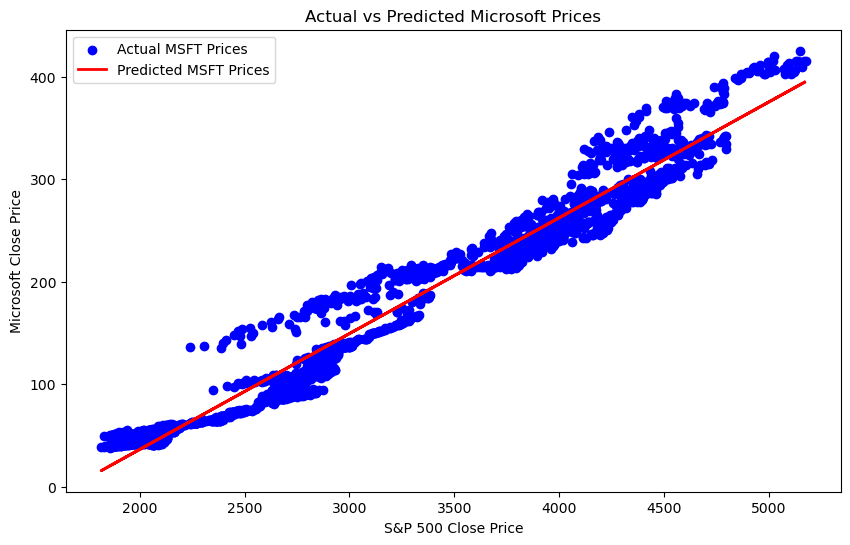

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


sp500 = yf.download('^GSPC', period='10y')['Close'].rename('SP500_Close')
msft = yf.download('MSFT', period='10y')['Close'].rename('MSFT_Close')


data = pd.concat([sp500, msft], axis=1)


data.dropna(inplace=True)


X = sm.add_constant(data['SP500_Close']) 
Y = data['MSFT_Close']


model = sm.OLS(Y, X).fit()


print(model.summary())


data['Predicted_MSFT_Close'] = model.predict(X)

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(data['SP500_Close'], data['MSFT_Close'], color='blue', label='Actual MSFT Prices')
plt.plot(data['SP500_Close'], data['Predicted_MSFT_Close'], color='red', linewidth=2, label='Predicted MSFT Prices')
plt.title('Actual vs Predicted Microsoft Prices')
plt.xlabel('S&P 500 Close Price')
plt.ylabel('Microsoft Close Price')
plt.legend()
plt.show()


In [7]:
#MOVING AVERAGES ALGO

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


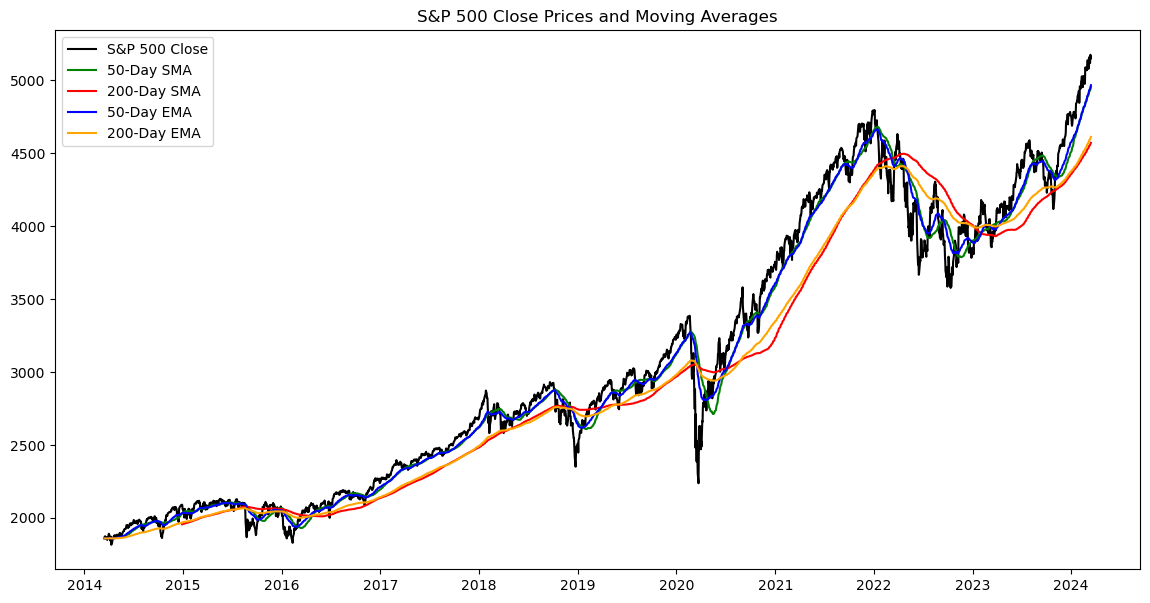

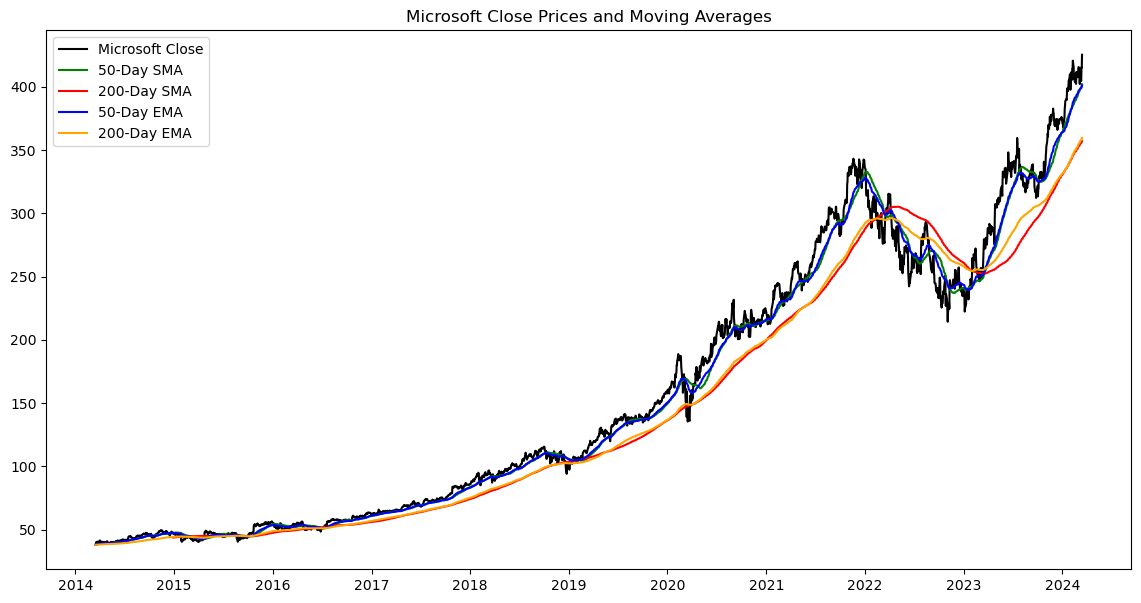

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


sp500 = yf.download('^GSPC', period='10y')['Close'].rename('SP500_Close')
msft = yf.download('MSFT', period='10y')['Close'].rename('MSFT_Close')


sp500_sma50 = sp500.rolling(window=50).mean()
sp500_sma200 = sp500.rolling(window=200).mean()
msft_sma50 = msft.rolling(window=50).mean()
msft_sma200 = msft.rolling(window=200).mean()


sp500_ema50 = sp500.ewm(span=50, adjust=False).mean()
sp500_ema200 = sp500.ewm(span=200, adjust=False).mean()
msft_ema50 = msft.ewm(span=50, adjust=False).mean()
msft_ema200 = msft.ewm(span=200, adjust=False).mean()


plt.figure(figsize=(14, 7))
plt.plot(sp500, label='S&P 500 Close', color='black')
plt.plot(sp500_sma50, label='50-Day SMA', color='green')
plt.plot(sp500_sma200, label='200-Day SMA', color='red')
plt.plot(sp500_ema50, label='50-Day EMA', color='blue')
plt.plot(sp500_ema200, label='200-Day EMA', color='orange')
plt.title('S&P 500 Close Prices and Moving Averages')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(msft, label='Microsoft Close', color='black')
plt.plot(msft_sma50, label='50-Day SMA', color='green')
plt.plot(msft_sma200, label='200-Day SMA', color='red')
plt.plot(msft_ema50, label='50-Day EMA', color='blue')
plt.plot(msft_ema200, label='200-Day EMA', color='orange')
plt.title('Microsoft Close Prices and Moving Averages')
plt.legend()
plt.show()


In [ ]:
#ARIMA

In [34]:
pip install statsmodels pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/40/e5/78afab229ccdaf6b947036440799dbdf88e2cd632e2f96b81f32de8aa05a/pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fc/84/5748f255f1689c95cf8dd0f2789480f7261ec0c82880a6a1f4daead6894d/Cython-3.0.9-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fitting ARIMA model to S&P 500 data...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24977.297, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25078.827, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25058.547, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25060.176, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25080.279, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25058.957, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25059.171, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24979.050, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25054.727, Time=1.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25057.906, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25058.835, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25059.684, Time=0.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24979.650, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=24979

/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2517
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12484.609
Date:                Thu, 14 Mar 2024   AIC                          24979.218
Time:                        18:57:42   BIC                          25008.371
Sample:                             0   HQIC                         24989.799
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7644      0.017   -102.736      0.000      -1.798      -1.731
ar.L2         -0.8877      0.016    -55.182      0.000      -0.919      -0.856
ma.L1          1.6991      0.022     78.356      0.0

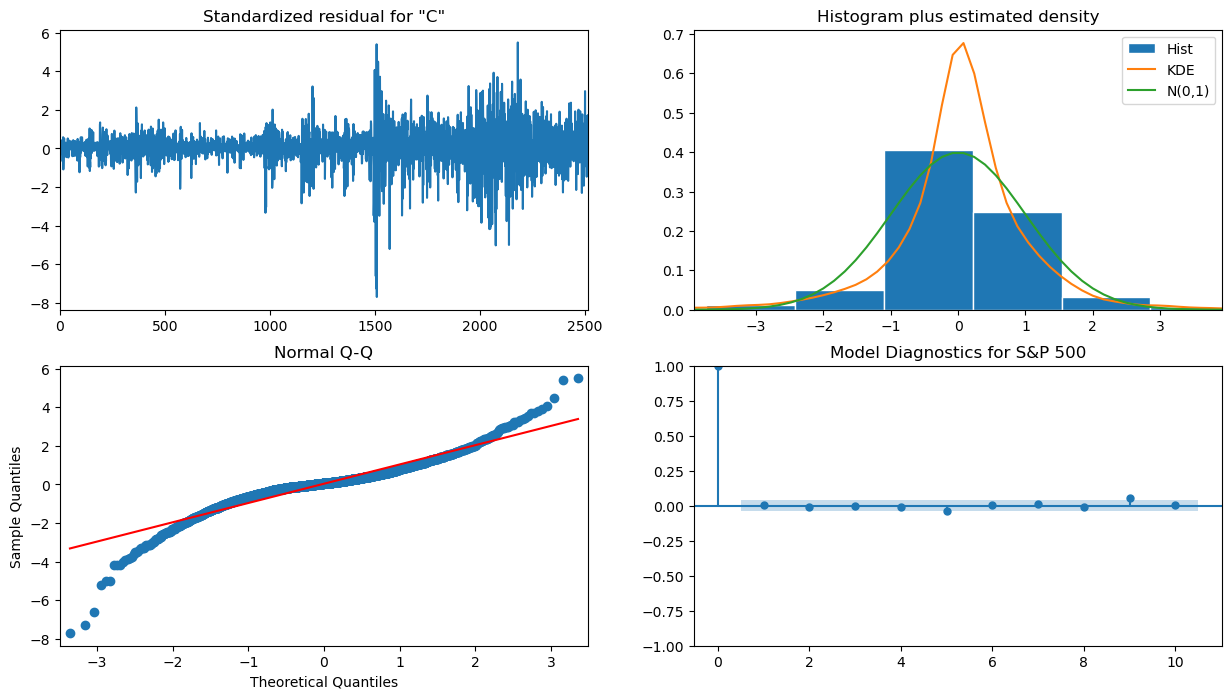


Fitting ARIMA model to Microsoft data...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13073.791, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13097.889, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13072.836, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13070.748, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13101.473, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13069.822, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13071.818, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13071.819, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13070.231, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13071.028, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13075.537, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.776 seconds
                               SARIMAX Results                                
Dep. Variable:        

/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


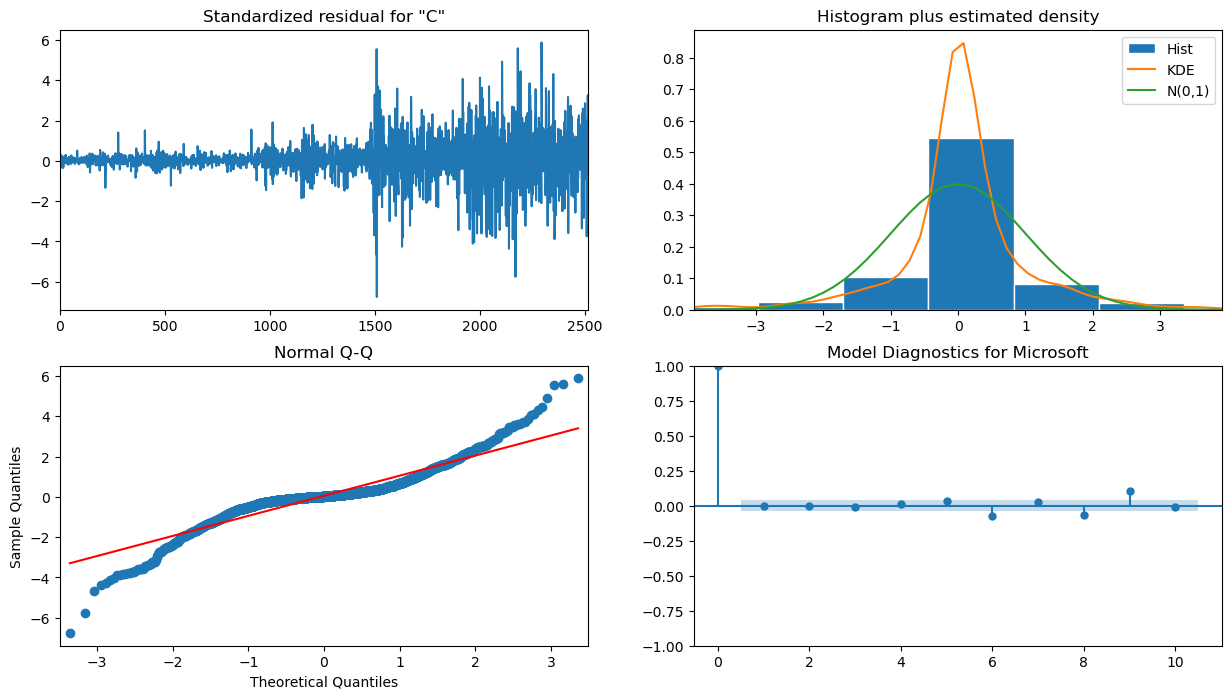

In [35]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pmdarima import auto_arima


sp500 = yf.download('^GSPC', period='10y')['Close']
msft = yf.download('MSFT', period='10y')['Close']


def fit_arima(stock_data, title):
    
    auto_model = auto_arima(stock_data, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

   
    print(auto_model.summary())

   
    model = ARIMA(stock_data, order=auto_model.order)
    model_fit = model.fit()

    
    print(model_fit.summary())

    
    model_fit.plot_diagnostics(figsize=(15, 8))
    plt.title(f'Model Diagnostics for {title}')
    plt.show()

    
    return model_fit


print("Fitting ARIMA model to S&P 500 data...")
sp500_model_fit = fit_arima(sp500, 'S&P 500')


print("\nFitting ARIMA model to Microsoft data...")
msft_model_fit = fit_arima(msft, 'Microsoft')


In [ ]:
#RANDOM FOREST REGRESSION

In [36]:
pip install yfinance scikit-learn pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean Squared Error for S&P 500: 86195.77642315152
Mean Squared Error for Microsoft: 1869.8565289951412


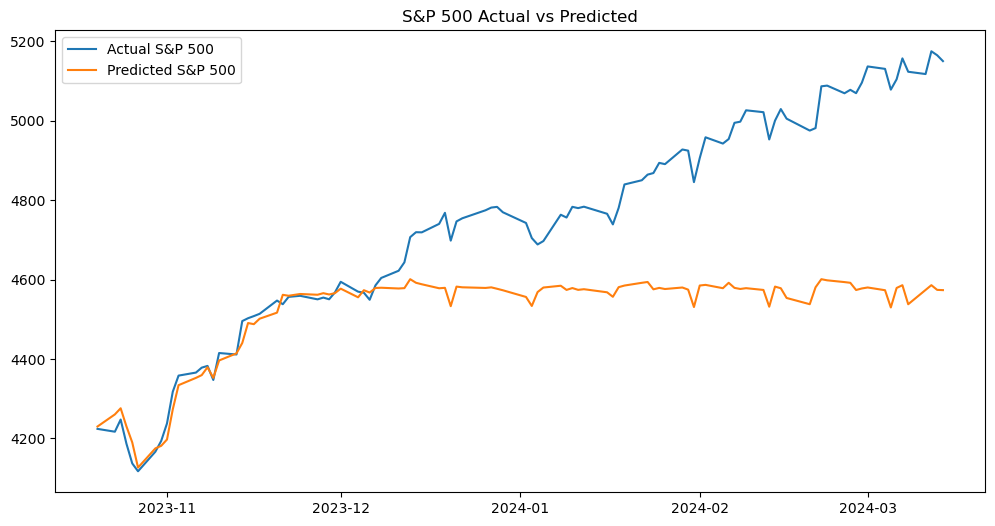

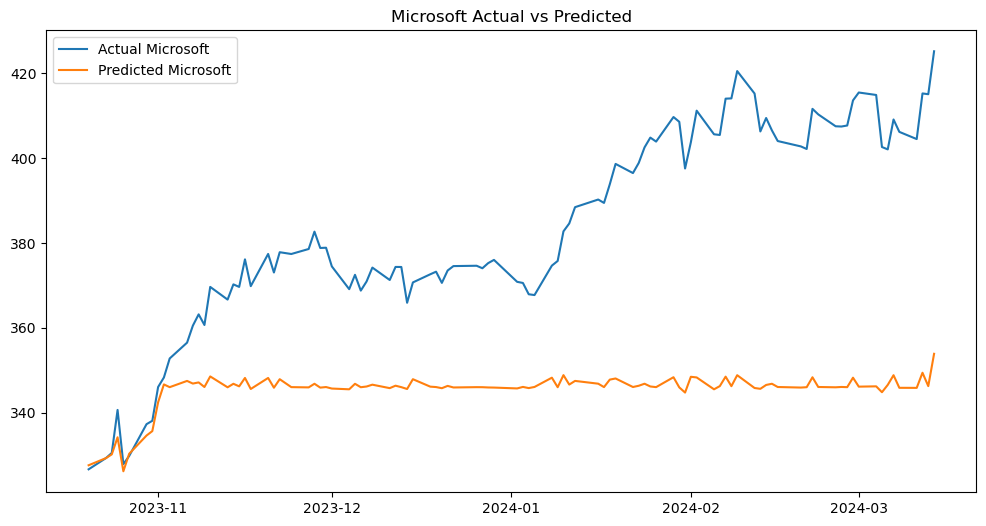

In [37]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create a feature dataset from stock closing prices
def create_features(data):
    data['Prev Close'] = data['Close'].shift(1)
    data['1-day change'] = data['Close'].diff()
    data['5-day average'] = data['Close'].rolling(window=5).mean()
    data['5-day volatility'] = data['Close'].rolling(window=5).std()
    data.dropna(inplace=True)
    return data

# Fetch historical data
sp500_data = yf.download('^GSPC', period='2y')
msft_data = yf.download('MSFT', period='2y')

# Create features
sp500_features = create_features(sp500_data)
msft_features = create_features(msft_data)

# Prepare the dataset for training
def prepare_data(data):
    X = data[['Prev Close', '1-day change', '5-day average', '5-day volatility']]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = prepare_data(sp500_features)
X_train_msft, X_test_msft, y_train_msft, y_test_msft = prepare_data(msft_features)

# Initialize and train the Random Forest model
rf_model_sp500 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sp500.fit(X_train_sp500, y_train_sp500)

rf_model_msft = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_msft.fit(X_train_msft, y_train_msft)

# Predictions
predictions_sp500 = rf_model_sp500.predict(X_test_sp500)
predictions_msft = rf_model_msft.predict(X_test_msft)

# Evaluate the model
mse_sp500 = mean_squared_error(y_test_sp500, predictions_sp500)
mse_msft = mean_squared_error(y_test_msft, predictions_msft)
print(f'Mean Squared Error for S&P 500: {mse_sp500}')
print(f'Mean Squared Error for Microsoft: {mse_msft}')

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y_test_sp500.index, y_test_sp500, label='Actual S&P 500')
plt.plot(y_test_sp500.index, predictions_sp500, label='Predicted S&P 500')
plt.legend()
plt.title('S&P 500 Actual vs Predicted')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_msft.index, y_test_msft, label='Actual Microsoft')
plt.plot(y_test_msft.index, predictions_msft, label='Predicted Microsoft')
plt.legend()
plt.title('Microsoft Actual vs Predicted')
plt.show()


In [9]:
#LSTM-Long Short-Term Memory 

In [10]:
pip install yfinance tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


8/8 [==============================] - 0s 4ms/step
MSE for S&P 500: 3476.401934590687
MSE for Microsoft: 83.61159269208247


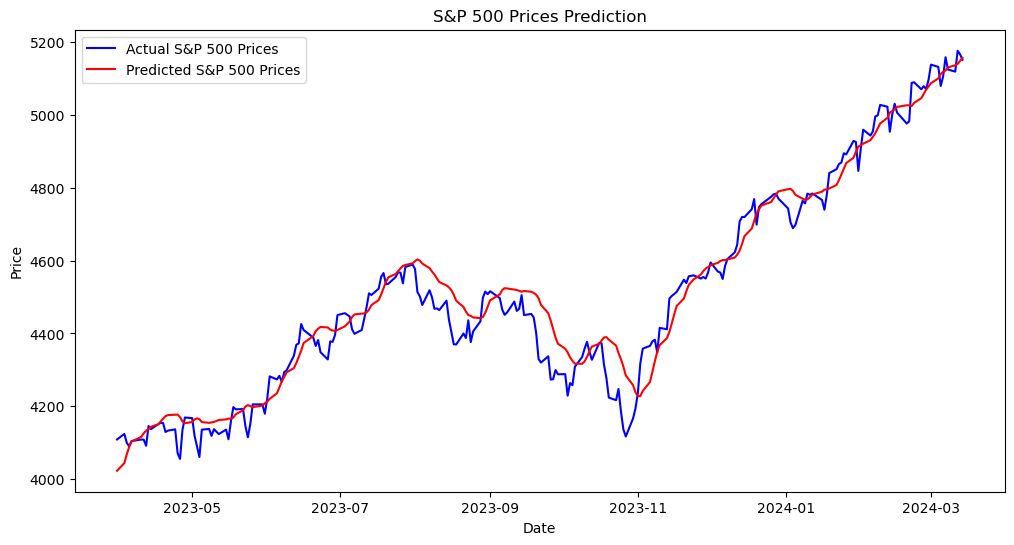

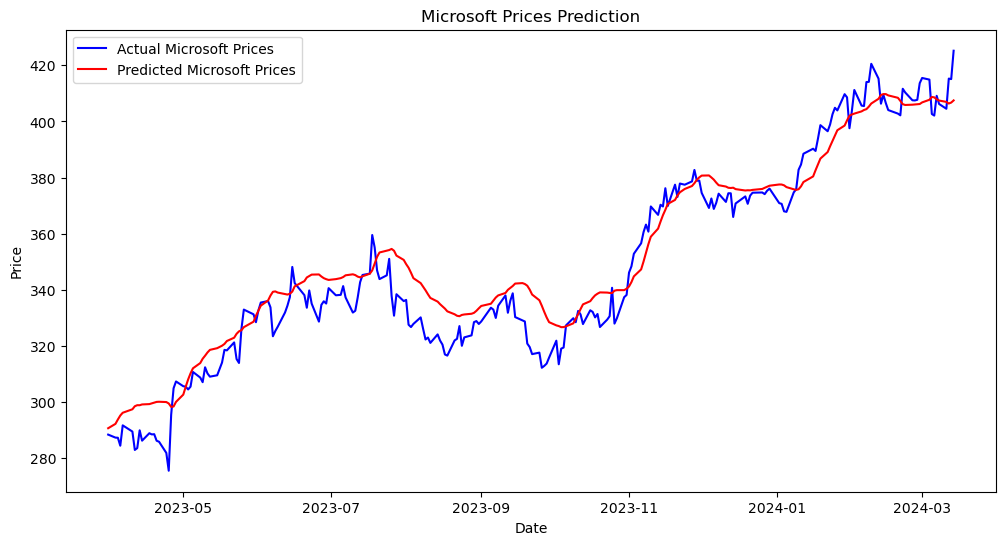

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

def prepare_data(ticker):
    data = yf.download(ticker, period='5y')['Close']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    look_back = 60
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i - look_back:i, 0])
        y.append(scaled_data[i, 0])
    
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler, data


X_sp500, y_sp500, scaler_sp500, data_sp500 = prepare_data('^GSPC')
X_msft, y_msft, scaler_msft, data_msft = prepare_data('MSFT')


split = int(len(X_sp500) * 0.8)
X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = X_sp500[:split], X_sp500[split:], y_sp500[:split], y_sp500[split:]

split = int(len(X_msft) * 0.8)
X_train_msft, X_test_msft, y_train_msft, y_test_msft = X_msft[:split], X_msft[split:], y_msft[:split], y_msft[split:]


def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


model_sp500 = create_model((X_train_sp500.shape[1], 1))
model_sp500.fit(X_train_sp500, y_train_sp500, batch_size=1, epochs=1)


model_msft = create_model((X_train_msft.shape[1], 1))
model_msft.fit(X_train_msft, y_train_msft, batch_size=1, epochs=1)


predictions_sp500 = model_sp500.predict(X_test_sp500)
predictions_sp500 = scaler_sp500.inverse_transform(predictions_sp500)
predictions_msft = model_msft.predict(X_test_msft)
predictions_msft = scaler_msft.inverse_transform(predictions_msft)


test_data_sp500 = scaler_sp500.inverse_transform(y_test_sp500.reshape(-1, 1))
test_data_msft = scaler_msft.inverse_transform(y_test_msft.reshape(-1, 1))

mse_sp500 = mean_squared_error(test_data_sp500, predictions_sp500)
mse_msft = mean_squared_error(test_data_msft, predictions_msft)

print(f'MSE for S&P 500: {mse_sp500}')
print(f'MSE for Microsoft: {mse_msft}')


plt.figure(figsize=(12,6))
plt.plot(data_sp500[-len(predictions_sp500):].index, test_data_sp500, color='blue', label='Actual S&P 500 Prices')
plt.plot(data_sp500[-len(predictions_sp500):].index, predictions_sp500, color='red', label='Predicted S&P 500 Prices')
plt.title('S&P 500 Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(data_msft[-len(predictions_msft):].index, test_data_msft, color='blue', label='Actual Microsoft Prices')
plt.plot(data_msft[-len(predictions_msft):].index, predictions_msft, color='red', label='Predicted Microsoft Prices')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
#SVM- Support Vector Machines

In [13]:
pip install yfinance numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MSE for S&P 500: 19018.617993379514
MSE for Microsoft: 174.26621980077024


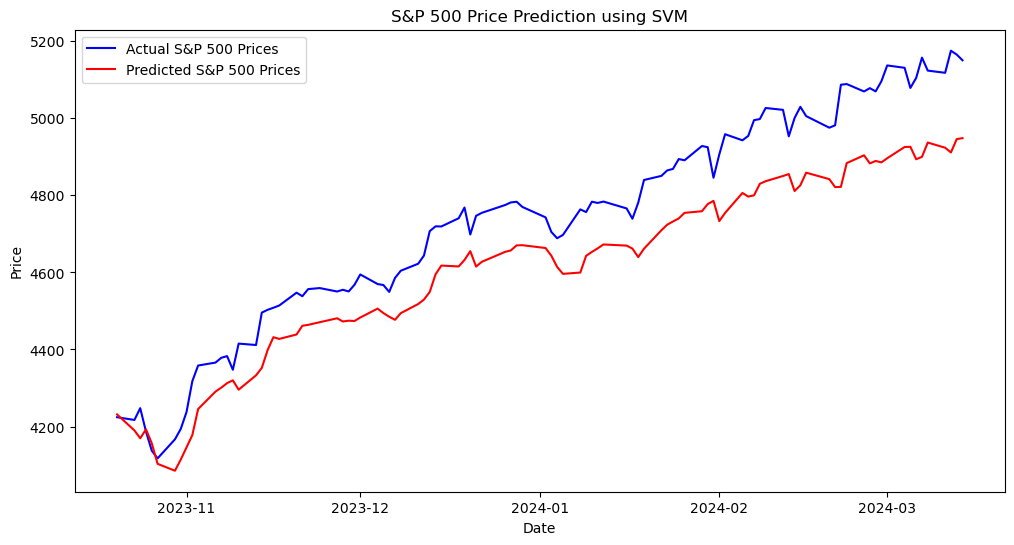

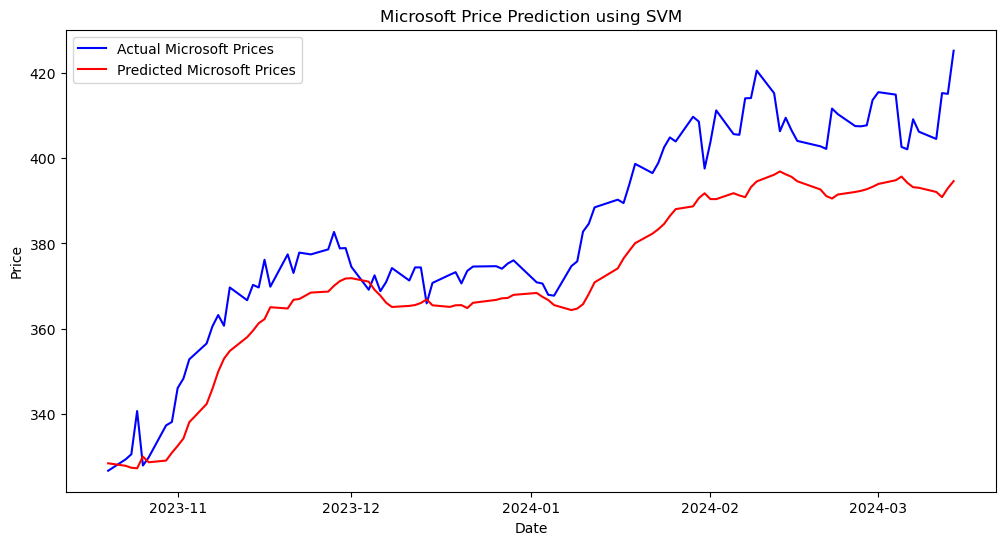

In [14]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


def prepare_data(ticker, feature_window=5):
    data = yf.download(ticker, period='2y')['Close']
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1,1))

    X, y = [], []
    for i in range(feature_window, len(scaled_data)):
        X.append(scaled_data[i-feature_window:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    return X, y, scaler, data


feature_window = 5
X_sp500, y_sp500, scaler_sp500, data_sp500 = prepare_data('^GSPC', feature_window)
X_msft, y_msft, scaler_msft, data_msft = prepare_data('MSFT', feature_window)


split_ratio = 0.8
split_sp500 = int(split_ratio * len(X_sp500))
X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = X_sp500[:split_sp500], X_sp500[split_sp500:], y_sp500[:split_sp500], y_sp500[split_sp500:]

split_msft = int(split_ratio * len(X_msft))
X_train_msft, X_test_msft, y_train_msft, y_test_msft = X_msft[:split_msft], X_msft[split_msft:], y_msft[:split_msft], y_msft[split_msft:]


model_sp500 = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_sp500.fit(X_train_sp500, y_train_sp500)

model_msft = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_msft.fit(X_train_msft, y_train_msft)


predictions_sp500 = scaler_sp500.inverse_transform(model_sp500.predict(X_test_sp500).reshape(-1,1))
predictions_msft = scaler_msft.inverse_transform(model_msft.predict(X_test_msft).reshape(-1,1))

y_test_sp500_scaled = scaler_sp500.inverse_transform(y_test_sp500.reshape(-1,1))
y_test_msft_scaled = scaler_msft.inverse_transform(y_test_msft.reshape(-1,1))


mse_sp500 = mean_squared_error(y_test_sp500_scaled, predictions_sp500)
mse_msft = mean_squared_error(y_test_msft_scaled, predictions_msft)

print(f'MSE for S&P 500: {mse_sp500}')
print(f'MSE for Microsoft: {mse_msft}')


plt.figure(figsize=(12,6))
plt.plot(data_sp500[-len(predictions_sp500):].index, y_test_sp500_scaled, color='blue', label='Actual S&P 500 Prices')
plt.plot(data_sp500[-len(predictions_sp500):].index, predictions_sp500, color='red', label='Predicted S&P 500 Prices')
plt.title('S&P 500 Price Prediction using SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(data_msft[-len(predictions_msft):].index, y_test_msft_scaled, color='blue', label='Actual Microsoft Prices')
plt.plot(data_msft[-len(predictions_msft):].index, predictions_msft, color='red', label='Predicted Microsoft Prices')
plt.title('Microsoft Price Prediction using SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:

Applying Principal Component Analysis (PCA) directly to stock prices like the S&P 500 and Microsoft (MSFT) is typically not about predicting stock prices but rather about understanding the underlying patterns, reducing dimensionality, or identifying key components that explain the most variance in the data.

In the context of stock prices, one might not use PCA for prediction but rather for feature extraction, risk management, or portfolio optimization. However, if you're looking to analyze the movement patterns of these stocks and see how they might correlate or contribute to the overall variance, you can apply PCA.

In [53]:
pip install yfinance numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Explained Variance Ratio: [0.97683339 0.02316661]


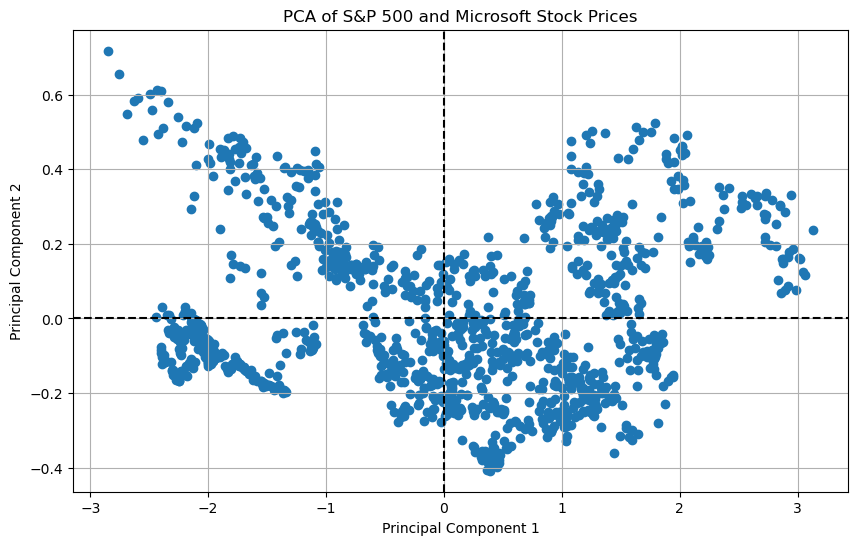

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


sp500_data = yf.download('^GSPC', period='5y')['Close'].to_frame('SP500_Close')
msft_data = yf.download('MSFT', period='5y')['Close'].to_frame('MSFT_Close')


data = pd.concat([sp500_data, msft_data], axis=1)


data.dropna(inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'], index=data.index)


print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


plt.figure(figsize=(10, 6))
plt.title('PCA of S&P 500 and Microsoft Stock Prices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.show()


# The Sharpe Ratio is a widely used metric in finance to evaluate the performance of an investment or portfolio. It measures the risk-adjusted return, indicating how much excess return an investment generates per unit of risk taken. 



S&P 500 Sharpe Ratio: 0.03256515707370013
Microsoft Sharpe Ratio: 0.06186600620133222


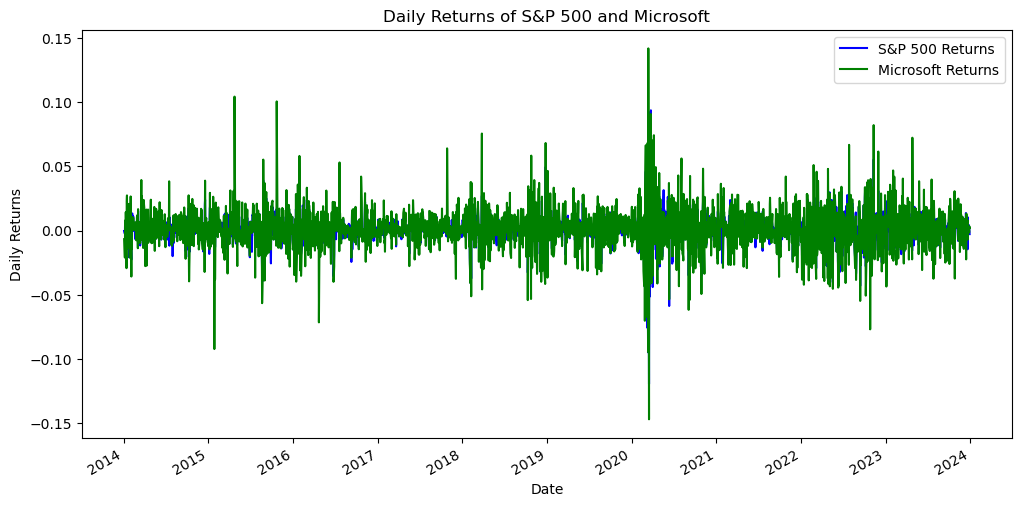

In [57]:
sp500_returns = sp500_data.pct_change().dropna()
msft_returns = msft_data.pct_change().dropna()

# Risk-free rate (assumed)
risk_free_rate = 0.02 / 252  # Annual risk-free rate of 2%, converted to daily

# Sharpe Ratio calculation
def sharpe_ratio(returns, risk_free_rate):
    return (returns.mean() - risk_free_rate) / returns.std()

sp500_sharpe_ratio = sharpe_ratio(sp500_returns, risk_free_rate)
msft_sharpe_ratio = sharpe_ratio(msft_returns, risk_free_rate)

print(f"S&P 500 Sharpe Ratio: {sp500_sharpe_ratio}")
print(f"Microsoft Sharpe Ratio: {msft_sharpe_ratio}")

# Plotting the returns
plt.figure(figsize=(12, 6))
sp500_returns.plot(label='S&P 500 Returns', color='blue')
msft_returns.plot(label='Microsoft Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of S&P 500 and Microsoft')
plt.legend()
plt.show()

In [ ]:
#BETA CALCULATION

In [59]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch historical data
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')['Adj Close']
msft_data = yf.download('MSFT', start='2014-01-01', end='2024-01-01')['Adj Close']

# Calculate daily returns
sp500_returns = sp500_data.pct_change().dropna()
msft_returns = msft_data.pct_change().dropna()

# Combine returns into a DataFrame
returns_df = pd.concat([sp500_returns, msft_returns], axis=1)
returns_df.columns = ['S&P 500 Returns', 'Microsoft Returns']

# Remove rows with NaN values
returns_df.dropna(inplace=True)

# Define X and y for linear regression
X = returns_df['S&P 500 Returns'].values.reshape(-1, 1)
y = returns_df['Microsoft Returns'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get beta coefficient (slope of the regression line)
beta = model.coef_[0]
print("Beta coefficient (MSFT):", beta)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Beta coefficient (MSFT): 1.206482667843786


In [ ]:
#A beta greater than 1 indicates that the stock is more volatile than the market, 
#while a beta less than 1 suggests it is less volatile.

In [61]:
#Cointegration Test: This statistical method checks whether there is a long-term equilibrium relationship between 
#MSFT and the S&P 500, suggesting that any deviations between them would be temporary and they would move together 
#over time.

In [62]:
#To perform a cointegration test between the S&P 500 and Microsoft (MSFT) stock prices, we can use the 
#Engle-Granger two-step method, which involves running a linear regression on the two price series and then 
#conducting a unit root test on the residuals

In [64]:
from statsmodels.tsa.stattools import coint
# Combine data into a DataFrame
df = pd.concat([sp500_data, msft_data], axis=1)
df.columns = ['S&P 500', 'MSFT']

# Drop rows with NaN values
df.dropna(inplace=True)

# Perform cointegration test
result = coint(df['S&P 500'], df['MSFT'])
print("Cointegration test p-value:", result[1])

Cointegration test p-value: 0.08127442245736216


In [ ]:
#The p-value returned from the test indicates whether the two price series are cointegrated. 
#A low p-value suggests that the series are cointegrated, meaning they move together in the long run. 
#If the p-value is above a certain threshold (e.g., 0.05), we may conclude that the series are not cointegrated.

In [1]:
pip install yfinance pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

# Download data
sp500 = yf.download('^GSPC', period='10y')
jp_morgan = yf.download('JPM', period='10y')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
print(sp500.isnull().sum())
print(jp_morgan.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
print(sp500.describe())
print(jp_morgan.describe())


              Open         High          Low        Close    Adj Close  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean   3092.431469  3109.010876  3074.689837  3093.033728  3093.033728   
std     937.174148   943.012386   931.469088   937.577981   937.577981   
min    1818.180054  1834.189941  1810.099976  1815.689941  1815.689941   
25%    2170.752441  2176.725037  2163.427490  2171.265076  2171.265076   
50%    2846.219971  2862.954956  2828.980103  2848.010010  2848.010010   
75%    3977.284973  4008.997498  3945.532532  3977.830017  3977.830017   
max    5257.970215  5264.850098  5245.819824  5254.350098  5254.350098   

             Volume  
count  2.516000e+03  
mean   3.963132e+09  
std    9.676289e+08  
min    1.296530e+09  
25%    3.369745e+09  
50%    3.788120e+09  
75%    4.320378e+09  
max    9.976520e+09  
              Open         High          Low        Close    Adj Close  \
count  2516.000000  2516.000000  2516.000000  2516.000000  25

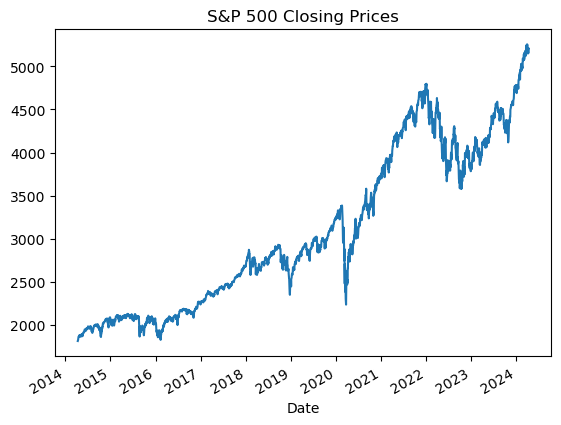

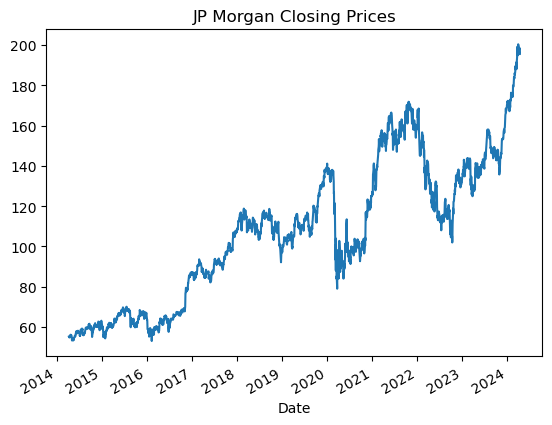

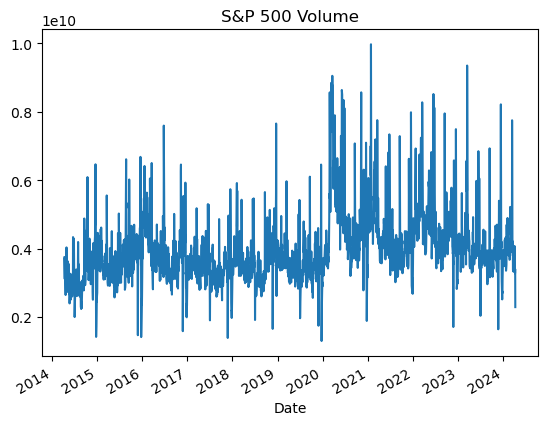

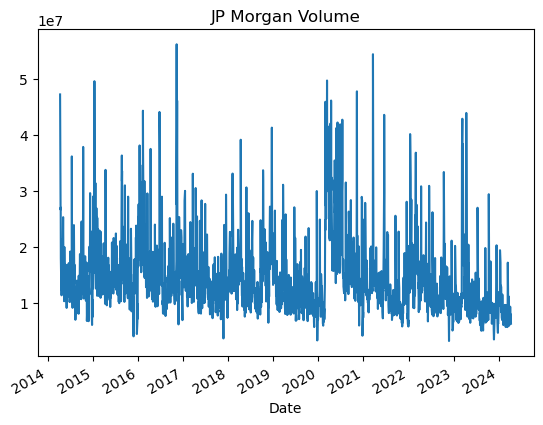

In [5]:
import matplotlib.pyplot as plt

# Plot closing prices
sp500['Close'].plot(title='S&P 500 Closing Prices')
plt.show()

jp_morgan['Close'].plot(title='JP Morgan Closing Prices')
plt.show()

# Plot volume
sp500['Volume'].plot(title='S&P 500 Volume')
plt.show()

jp_morgan['Volume'].plot(title='JP Morgan Volume')
plt.show()


In [6]:
import yfinance as yf
import pandas as pd

# Download historical data for the two stocks/indices
sp500_data = yf.download('SPY', start='2014-01-01', end='2024-01-01')
jpm_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')

# Ensure the data is aligned and clean
combined_data = pd.DataFrame({
    'SP500': sp500_data['Adj Close'],
    'JPM': jpm_data['Adj Close']
}).dropna()

# Calculate daily returns
daily_returns = combined_data.pct_change().dropna()

# Calculate the correlation between the daily returns of the two stocks/indices
correlation = daily_returns.corr()

print(correlation)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

          SP500       JPM
SP500  1.000000  0.738979
JPM    0.738979  1.000000


In [7]:
import yfinance as yf
import pandas as pd

# Fetch historical data for JP Morgan and the S&P 500 index
stock_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
market_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Ensure the data is aligned and clean
combined_data = pd.DataFrame({
    'Stock': stock_data['Adj Close'],
    'Market': market_data['Adj Close']
}).dropna()

# Calculate daily returns
daily_returns = combined_data.pct_change().dropna()

# Calculate the covariance between JPM and the S&P 500
covariance = daily_returns['Stock'].cov(daily_returns['Market'])

# Calculate the variance of the S&P 500
variance = daily_returns['Market'].var()

# Calculate beta
beta = covariance / variance

print(f"The beta of JPM relative to the S&P 500 is: {beta}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The beta of JPM relative to the S&P 500 is: 1.1244556520409856


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the risk-free rate (annualized)
risk_free_rate = 0.02

# Fetch historical data
stock_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
market_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Calculate daily returns
stock_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()

# Calculate excess returns (subtract the risk-free rate)
excess_stock_returns = stock_returns - risk_free_rate / 252
excess_market_returns = market_returns - risk_free_rate / 252

# Calculate annualized Sharpe Ratios
sharpe_ratio_stock = np.sqrt(252) * excess_stock_returns.mean() / excess_stock_returns.std()
sharpe_ratio_market = np.sqrt(252) * excess_market_returns.mean() / excess_market_returns.std()

print(f"Sharpe Ratio for JPM: {sharpe_ratio_stock}")
print(f"Sharpe Ratio for S&P 500: {sharpe_ratio_market}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sharpe Ratio for JPM: 0.5605262195032656
Sharpe Ratio for S&P 500: 0.5169558421365985


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


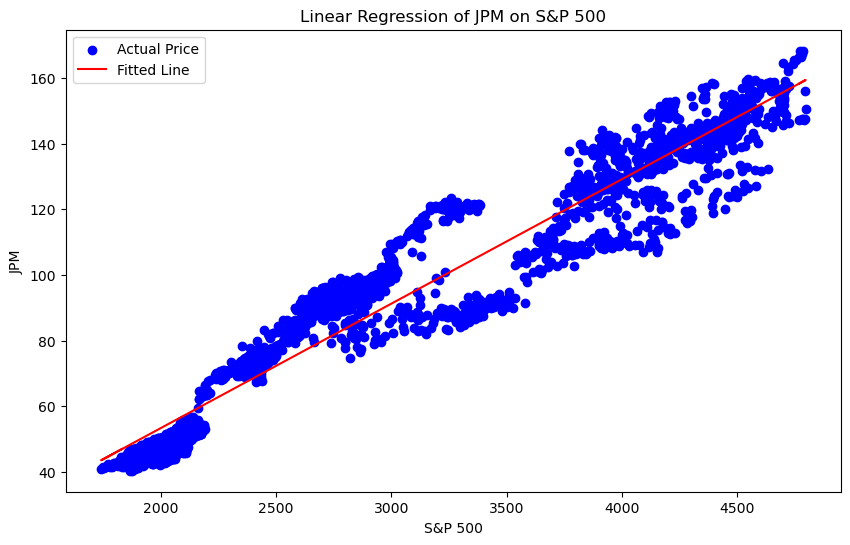

Coefficient: 0.03791275615139549
Intercept: -22.501742659149386
Mean squared error: 89.27930061202976
R^2 score: 0.9289491427649218


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download stock data
jpm_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Select the Adjusted Close prices
jpm_prices = jpm_data['Adj Close']
sp500_prices = sp500_data['Adj Close']

# Ensure the data aligns
data = pd.DataFrame({
    'JPM': jpm_prices,
    'SP500': sp500_prices
})
data.dropna(inplace=True)

# Prepare data for regression
X = data['SP500'].values.reshape(-1, 1)  # Features
y = data['JPM'].values.reshape(-1, 1)    # Target variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression of JPM on S&P 500')
plt.xlabel('S&P 500')
plt.ylabel('JPM')
plt.legend()
plt.show()

# Print model statistics
print(f"Coefficient: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")
print(f"Mean squared error: {mean_squared_error(y, y_pred)}")
print(f"R^2 score: {r2_score(y, y_pred)}")


In [9]:
pip install yfinance pandas statsmodels


Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

# Download historical data for JPM and the S&P 500
jpm_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Calculate daily returns
jpm_returns = jpm_data['Adj Close'].pct_change().dropna()
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

# Align the data
data = pd.DataFrame({'JPM': jpm_returns, 'SP500': sp500_returns}).dropna()

# Define the independent variable (X) and the dependent variable (y)
X = data['SP500']
y = data['JPM']

# Add a constant to the independent variable to include the intercept in the model
X1 = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X1).fit()

# Print out the statistics
print(model.summary())

# If you're interested in the slope (beta) and intercept only
print(f"\nBeta: {model.params['SP500']}")
print(f"Intercept: {model.params['const']}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3050.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:33:31   Log-Likelihood:                 7683.1
No. Observations:                2515   AIC:                        -1.536e+04
Df Residuals:                    2513   BIC:                        -1.535e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.791      0.4

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


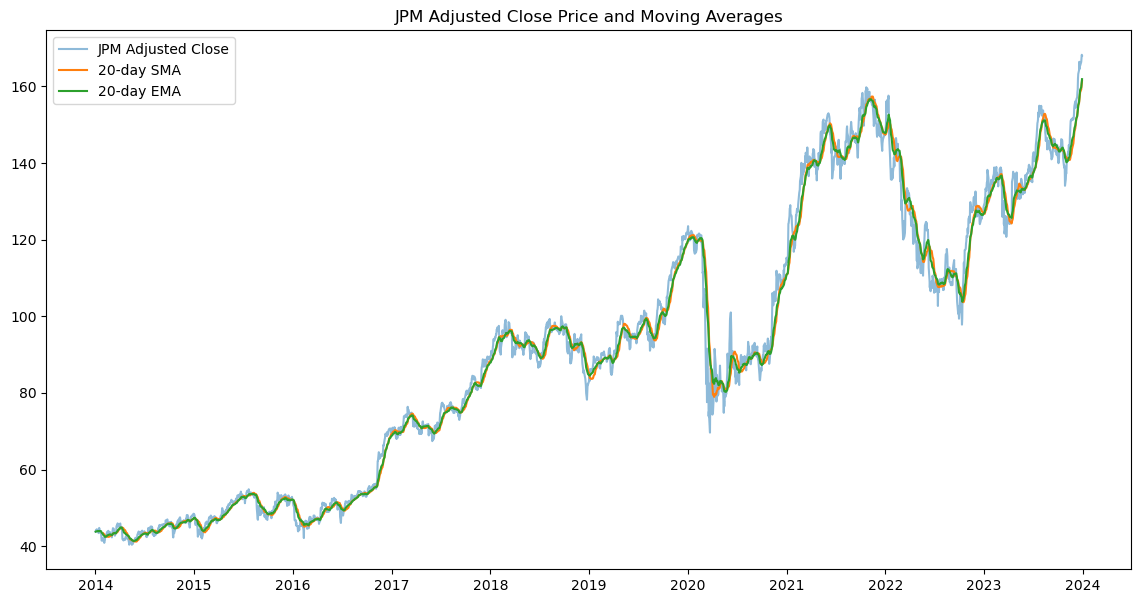

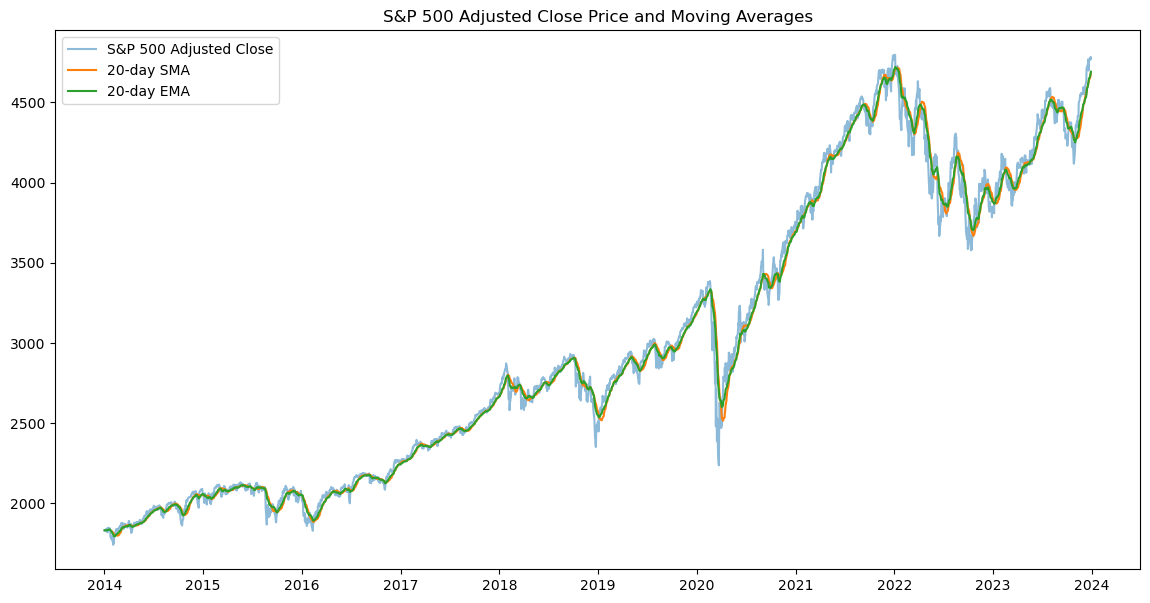

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for JPM and the S&P 500
jpm_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Calculate 20-day Simple Moving Average (SMA) and Exponential Moving Average (EMA)
jpm_data['20-day SMA'] = jpm_data['Adj Close'].rolling(window=20).mean()
jpm_data['20-day EMA'] = jpm_data['Adj Close'].ewm(span=20, adjust=False).mean()

sp500_data['20-day SMA'] = sp500_data['Adj Close'].rolling(window=20).mean()
sp500_data['20-day EMA'] = sp500_data['Adj Close'].ewm(span=20, adjust=False).mean()

# Plotting JPM
plt.figure(figsize=(14, 7))
plt.plot(jpm_data['Adj Close'], label='JPM Adjusted Close', alpha=0.5)
plt.plot(jpm_data['20-day SMA'], label='20-day SMA')
plt.plot(jpm_data['20-day EMA'], label='20-day EMA')
plt.title('JPM Adjusted Close Price and Moving Averages')
plt.legend()
plt.show()

# Plotting S&P 500
plt.figure(figsize=(14, 7))
plt.plot(sp500_data['Adj Close'], label='S&P 500 Adjusted Close', alpha=0.5)
plt.plot(sp500_data['20-day SMA'], label='20-day SMA')
plt.plot(sp500_data['20-day EMA'], label='20-day EMA')
plt.title('S&P 500 Adjusted Close Price and Moving Averages')
plt.legend()
plt.show()


In [ ]:
#RFR

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


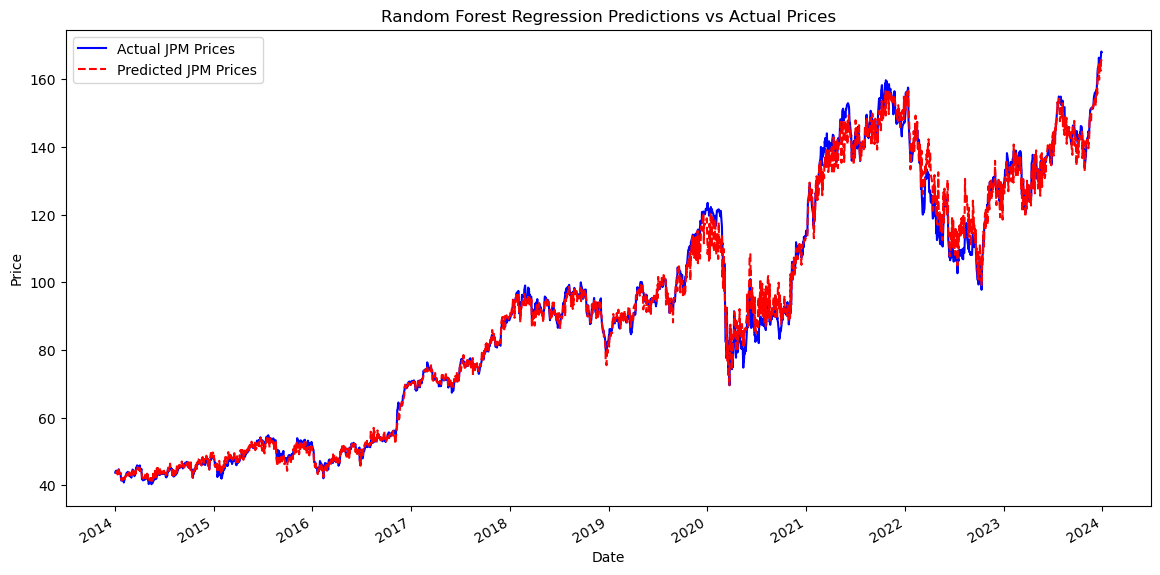

Mean squared error: 9.86000037762447
R^2 score: 0.9921531477692376


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Download stock data
jpm_data = yf.download('JPM', start='2014-01-01', end='2024-01-01')
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Select the Adjusted Close prices
jpm_prices = jpm_data['Adj Close']
sp500_prices = sp500_data['Adj Close']

# Ensure the data aligns
data = pd.DataFrame({
    'JPM': jpm_prices,
    'SP500': sp500_prices
})
data.dropna(inplace=True)  # Removing any NA values

# Prepare data for regression
X = data[['SP500']]  # Features
y = data['JPM']      # Target variable

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict using the model
y_pred = rf.predict(X)

# Create a DataFrame to store actual and predicted values along with dates
results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
}, index=data.index)

# Visualization
plt.figure(figsize=(14, 7))
results['Actual'].plot(label='Actual JPM Prices', color='blue')
results['Predicted'].plot(label='Predicted JPM Prices', color='red', linestyle='--')
plt.title('Random Forest Regression Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model Evaluation
print(f"Mean squared error: {mean_squared_error(results['Actual'], results['Predicted'])}")
print(f"R^2 score: {r2_score(results['Actual'], results['Predicted'])}")


In [ ]:
#SVM

In [12]:
pip install yfinance pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [13]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Fetch historical data
data = yf.download('JPM', start='2014-01-01', end='2024-01-01')

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Define a simple feature: previous day's return
data['Previous Returns'] = data['Returns'].shift(1)

# Define the target variable: direction of next day's return (1 for up, 0 for down)
data['Direction'] = np.where(data['Returns'].shift(-1) > 0, 1, 0)

# Drop missing values
data = data.dropna()

# Define features (X) and target (y)
X = data[['Previous Returns']]
y = data['Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict the direction of returns
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

Model accuracy: 53.68%


[*********************100%%**********************]  1 of 1 completed

Model accuracy: 53.68%


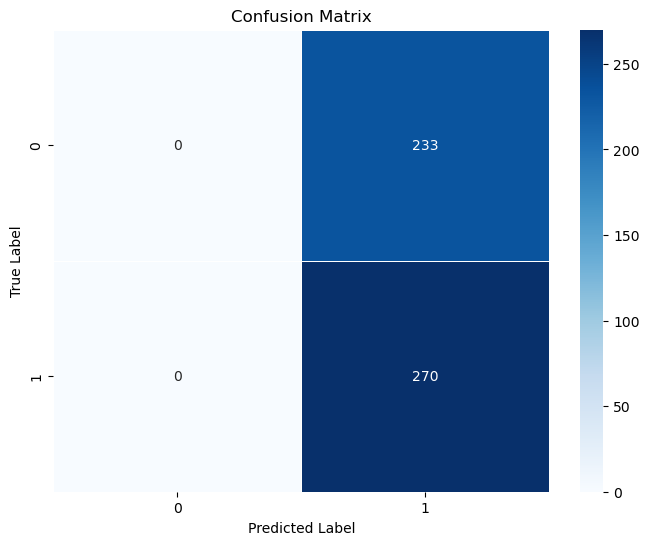

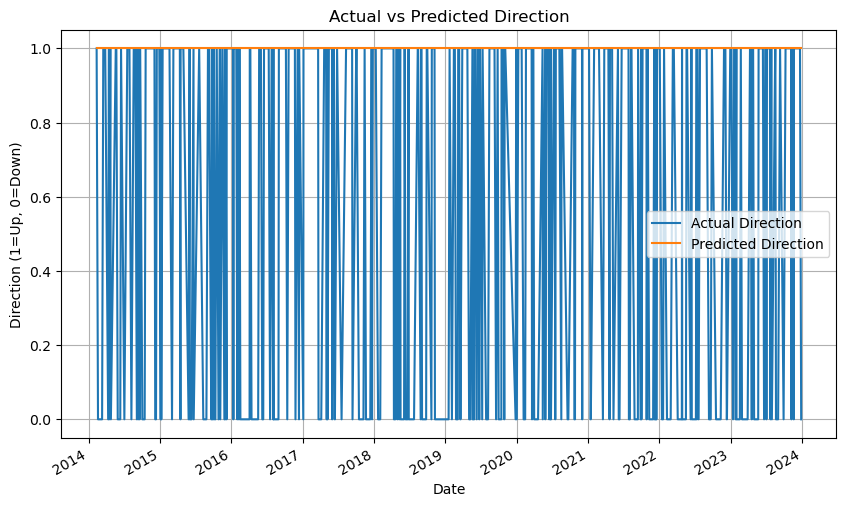

In [5]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data
data = yf.download('JPM', start='2014-01-01', end='2024-01-01')

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Define a simple feature: previous day's return
data['Previous Returns'] = data['Returns'].shift(1)

# Define the target variable: direction of next day's return (1 for up, 0 for down)
data['Direction'] = np.where(data['Returns'].shift(-1) > 0, 1, 0)

# Drop missing values
data = data.dropna()

# Define features (X) and target (y)
X = data[['Previous Returns']]
y = data['Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict the direction of returns
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comparing actual vs predicted in a plot
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
comparison.plot(kind='line', figsize=(10, 6))
plt.title('Actual vs Predicted Direction')
plt.xlabel('Date')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.legend(['Actual Direction', 'Predicted Direction'])
plt.grid(True)
plt.show()


In [ ]:
In financial data science and the stock market, these models can help:
Forecast future stock prices or movements.
Understand factors influencing price changes.
Estimate the risk or volatility.
Optimize investment portfolios.
Detect and capitalize on market inefficiencies.
Conduct algorithmic trading.
